In [138]:
# !{sys.executable} -m pip install
%matplotlib inline

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import matplotlib.pyplot as plt
import numpy as np

import pdftotext
import io
import re

f = open('stopword-fr.txt', 'r')
frenchStopWords = [line.rstrip('\n') for line in f]

with open('/home/jovyan/work/fabrication_piece_caoutchouc.pdf', 'rb') as file:
# mem = io.BytesIO(file)

    pdf = pdftotext.PDF(file)
page = ""
toProcess= len(pdf)//3
for i in range(toProcess):
    page += pdf[i]

# page = pdf[28]

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
# Cleaning
import re 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@;:’]')
BAD_SYMBOLS_RE = re.compile('[^a-zA-ZèáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]')
page = REPLACE_BY_SPACE_RE.sub(' ', page)
page = BAD_SYMBOLS_RE.sub(' ', page)
page = page.replace('\n', '')
page = page.replace('À RETENIR', '')
page = page.lower()
# page = " ".join(page.split())
page = " ".join(word for word in page.split() if word not in frenchStopWords)

page = page.lower()

In [140]:
import operator 
import math
from math import log, exp


# remove stop word & create dict
wordDict = {}
for i in page.split():
    if i not in frenchStopWords:
        if i in wordDict.keys():
            wordDict[i] += 1
        else:
            wordDict[i] = 1
for i,v in wordDict.items() :
    temp = math.log(v, 2)
    wordDict[i] = temp

temp = {}
for k, v in wordDict.items():
    if v > 0 and k != "nd":
        temp[k] = v
        
toDisplay = {}
for i,v in temp.items():
    if v > (max(temp.values())//2):
        toDisplay[i] = math.exp(v)
sorted_by_value = sorted(toDisplay.items(), key=lambda kv: kv[1])

X_ = []
Y_ = []

for i in range(len(sorted_by_value) - 1, -1, -1):
    X_.append(sorted_by_value[i][1])
    Y_.append(sorted_by_value[i][0])

X_ = np.array(X_)
Y_ = np.array(Y_)


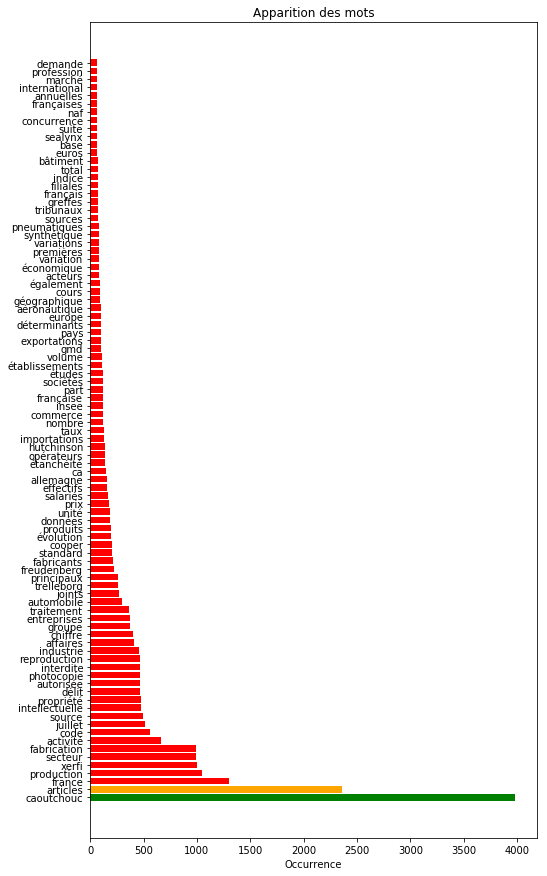

In [141]:
m = np.max(X_)

colors = []
for i in X_:
    if i / m > 2 / 3:
        colors.append('g')
    elif i / m > 1 / 3:
        colors.append('orange')
    else:
        colors.append('r')

fig, ax = plt.subplots(figsize=(8, 15))
ax.barh(Y_, X_, align='center', color=colors)
ax.set_yticklabels(Y_)
ax.set_xlabel('Occurrence')
ax.set_title('Apparition des mots')
plt.show()

In [142]:
mostImportant = Y_[3]
print(mostImportant)

production


In [143]:
words = page.split()

couple = []

while(mostImportant in words):
    prev = words[words.index(mostImportant) - 1]
    nxt = words[words.index(mostImportant) + 1]
    
    couple.append(str(prev) + ' ' + mostImportant + ' ' + str(nxt))
    words.remove(mostImportant)
    
couple

['orienté production automobile',
 'tirer production hexagonale',
 'caoutchouc production aéronautique',
 'militaire production rafale',
 'pleine production nouvelles',
 'délocalisé production sealynx',
 'total production pologne',
 'capacités production profession',
 'prix production caoutchoutiers',
 'usine production joints',
 'minière production entièrement',
 'déterminants production française',
 'automobile production française',
 'spatiale production française',
 'capacités production france',
 'secteur production industrie',
 'volume production industrie',
 'prix production industrie',
 'secteur production articles',
 'prix production articles',
 'sectoriel production industrie',
 'automobile production aéronautique',
 'spatiale production bâtiment',
 'activité production articles',
 'ts production chiffre',
 'salariés production articles',
 'sectoriel production industrie',
 'automobile production aéronautique',
 'spatiale production bâtiment',
 'données production française',

In [144]:
import spacy
from spacy import displacy
nlp = spacy.load('fr')

In [145]:
page = ""
toProcess= len(pdf)//2
for i in range(toProcess):
    page += pdf[i]
    
def clean_text_keep_numbers(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@;:’]')
    BAD_SYMBOLS_RE = re.compile('[^a-zA-Z0-9èáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]')
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    text = text.replace('\n', '')
    text = text.replace('À RETENIR', '')
    text = text.lower()
    text = " ".join(text.split())
    return text
    
def clean_text_not_keep_numbers(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@;:’]')
    BAD_SYMBOLS_RE = re.compile('[^a-zA-ZèáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]')
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    text = text.replace('\n', '')
    text = text.replace('À RETENIR', '')
    text = text.lower()
    text = " ".join(text.split())
    return text

def clean_stop_words(text):
    text = " ".join(word for word in text.split() if word not in frenchStopWords)
    return text
    
page = clean_text_keep_numbers(page)
page = clean_stop_words(page)

In [146]:
import pandas as pd

def check_in_array(list1, list2):
    for value in list1 :
        if value in list2:
            return True
    return False

doc = nlp(page)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [147]:
#sentence_spans = list(doc.sents)
#displacy.render(sentence_spans, style='dep', jupyter=True) #pour afficher les liens entre les tokens des phrases
temp = []

from owlready import *
# /home/jovyan/work/to_check.owl
onto = get_ontology('file:///home/jovyan/work/to_check.owl')
onto.load()
toCheck = []
for concept in onto.classes:
    toCheck.append(str(concept))
# toCheckDomain = [] placer une ontologie de domaine ici pour préciser ce qu'on souhaite observer dans le texte au niveau du token.text

arrayToken=[]
res = pd.DataFrame(columns=('texte','dep', 'head text','head pos','adj','lemma'))
i=0
for token in doc:
    temp.clear()
    childs = [child for child in token.children]
    for item in childs:
        temp.append(str(item))
    if check_in_array(temp, toCheck):
        adjArray = np.asarray(temp)
        #arrayTokens = np.append(arrayTokens, np.array([token.text, token.dep_, token.head.text, token.head.pos_, adjArray]), axis=0)
        res.loc[i] = np.array([token.text, token.dep_, token.head.text, token.head.pos_, adjArray, token.lemma_])
        i = i+1
res

,texte,dep,head text,head pos,adj,lemma
0,xerfi,ROOT,xerfi,VERB,"[www, mail, adresse, 81, conjoncture, previsio...",xerfi
1,voyants,nsubj,progressera,VERB,"[demande, vert, synth, produits]",voyant
2,synth,nmod,voyants,NOUN,"[1, chiffre, affaires]",synth
3,marché,nmod,mai,NOUN,"[français, voitures, hausse, an]",marché
4,tirer,ROOT,tirer,VERB,"[mai, psa, continuera, production]",tirer
5,parallèle,nmod,marque,ADJ,"[ds, renault, maintiendra, croissance]",parallèle
6,programmes,obl,progressera,VERB,"[soutenue, succès, a350, a320, airbus, product...",programme
7,bémol,amod,contribuera,VERB,"[secteur, bâtiment, porteur, baisse, dispositi...",bémol
8,pression,ROOT,pression,NOUN,"[baisse, prix, prix]",pression
9,diminué,ROOT,diminué,VERB,"[mois, rss, 30, glissement, production, représ...",diminuer


In [148]:
lemma = []
for token in doc:
    lemma = np.append(lemma, token.lemma_)

In [149]:
#from PyDictionary import PyDictionary
#dictionary=PyDictionary()
#print (dictionary.translate("Industry",'fr'))

In [163]:
import requests
wikipedia_url = requests.get('https://fr.wikipedia.org/wiki/Caoutchouc_(mat%C3%A9riau)').text
from bs4 import BeautifulSoup
soup = BeautifulSoup(wikipedia_url, 'html.parser')
#soup.get_text()
text_to_get = ''
for tag in soup.find_all('p'):
    text_to_get += tag.get_text()
text_to_get = clean_text_keep_numbers(text_to_get)
text_to_get = clean_stop_words(text_to_get)
docWiki = nlp(text_to_get)
lemmaWiki = []
for token in docWiki:
    lemmaWiki = np.append(lemmaWiki, token.lemma_)

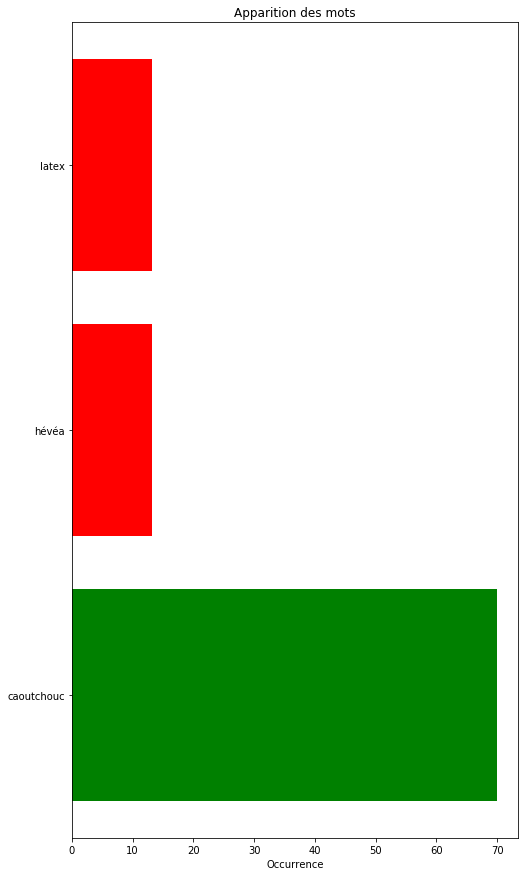

In [165]:
# remove stop word & create dict
wordDict = {}
for i in lemmaWiki:
    if i in wordDict.keys():
        wordDict[i] += 1
    else:
        wordDict[i] = 1
for i,v in wordDict.items() :
    temp = math.log(v, 2)
    wordDict[i] = temp

temp = {}
for k, v in wordDict.items():
    if v > 0 and k != "nd":
        temp[k] = v
        
toDisplay = {}
for i,v in temp.items():
    if v > (max(temp.values())//2):
        toDisplay[i] = math.exp(v)
sorted_by_value = sorted(toDisplay.items(), key=lambda kv: kv[1])

X_ = []
Y_ = []

for i in range(len(sorted_by_value) - 1, -1, -1):
    X_.append(sorted_by_value[i][1])
    Y_.append(sorted_by_value[i][0])

X_ = np.array(X_)
Y_ = np.array(Y_)

m = np.max(X_)

colors = []
for i in X_:
    if i / m > 2 / 3:
        colors.append('g')
    elif i / m > 1 / 3:
        colors.append('orange')
    else:
        colors.append('r')

fig, ax = plt.subplots(figsize=(8, 15))
ax.barh(Y_, X_, align='center', color=colors)
ax.set_yticklabels(Y_)
ax.set_xlabel('Occurrence')
ax.set_title('Apparition des mots')
plt.show()